# Exploratory Data Analysis

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

## Inspeksi Data

Dataset didapat dari Kaggle. <br>
Data dapat diunduh pada tautan berikut,<br>
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [3]:
df = pd.read_csv("./dataset/bestsellers with categories.csv")

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Total data berjumlah 550 data dengan banyak kolom / variabel sebanyak 7. Rincian dari setiap variabel ini antara lain, 3 variabel bertipe string, 1 float, dan 3 sisanya integer. <br>
Penjelasan mengenai setiap variabel / _data dictionary_ dari dataset ini dapat diakses pada tautan berikut: <br>
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

## Exploratory Data Analysis

EDA dilakukan untuk memahami data lebih dalam. EDA pada kasus ini dilakukan dengan menganalisa setiap variabelnya lalu mengaitkannya pada variabel lain nantinya.

In [11]:
# set tema / style untuk setiap plot yang dibuat
sns.set_style(style="darkgrid")

In [12]:
def makeDistribution(data):
    fig, ax = plt.subplots()
    mean, median, mode = data.mean(), data.median(), data.mode()[0]
    sns.histplot(data, ax=ax)
    ax.axvline(mean, color='r', linestyle='--')
    ax.axvline(median, color='g')
    ax.axvline(mode, color='b')

    plt.legend({
        'Mean' : mean,
        'Median' : median,
        'Mode' : mode
    })
    plt.show()

Untuk membuat grafik distribusi dengan mudah, proses saya buat sebagai fungsi sehingga dapat digunakan lagi nantinya.

### Weighted Rating

Sebelum melanjutkan lebih jauh, menurut saya variabel _weighted rating_ perlu dibuat. Mengapa demikian? <br>
Nilai suatu buku pada dataset ini dinyatakan dalam bentuk angka yang berada pada variabel _User Rating_. Variabel ini merupakan hasil rata-rata dari penilaian pembeli. Lalu variabel _Reviews_ adalah variabel yang menunjukkan banyaknya pembeli yang melakukan penilaian pada buku tersebut.

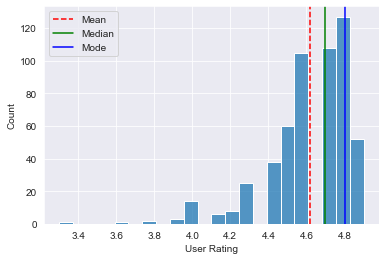

In [39]:
makeDistribution(df['User Rating'])

Distribusi berada pada rentang 3.4 hingga 4.8. Variasi dari distribusi ini dapat dibilang kecil. Mayoritas berada pada angka 4.8.

Saya rasa tidak adil membandingkan buku yang memiliki _User Rating_ sebesar 4.8  dan banyak _Reviews_ 10 dengan buku yang memiliki _User Rating_ 3.4 dan banyak _Reviews_ 10000. Untuk mengatasi hal ini, kedua variabel akan dipertimbangkan lalu membuat skor tersendiri yang menggunakan kedua variabel ini. Skor ini akan saya namakan _Weighted Rating_.

Sistem _weighted rating_ ini juga diterapkan pada salah satu situs penyedia informasi film terbesar, yaitu IMDb. IMDb menggunakan rumus tersendiri untuk menghitung skor rating ini dengan mempertimbangkan rating penonton dengan jumlah rating. Penjelasan mendetail mengenai rumus ini dapat dilihat pada pada tautan <a href="https://mathforums.com/threads/understanding-the-imdb-weighted-rating-function.265489/">berikut</a>. Rumus ini akan saya gunakan di dalam fungsi untuk menghitung _weighted rating_.

In [9]:
m = df['Reviews'].min()
C = df['User Rating'].mean()

def getWeightedRating(data, m=m, C=C):
    v = data['Reviews']
    R = data['User Rating']
    return (v/(v+m)*R) + (m/(v+m)*C)

In [10]:
df['Weighted Rating'] = df.apply(lambda x: getWeightedRating(x), axis=1)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127


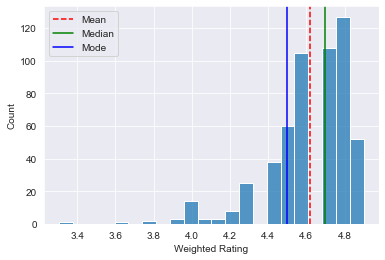

In [13]:
makeDistribution(df['Weighted Rating'])

Distribusi _Weighted Rating_ memiliki bentuk yang hampir sama seperti _User Rating_.

<AxesSubplot:xlabel='Year', ylabel='Weighted Rating'>

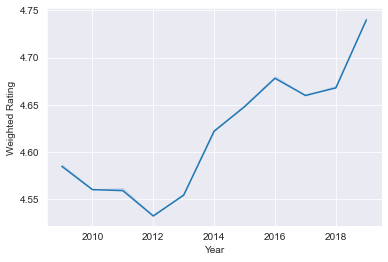

In [14]:
sns.lineplot(data=df, x='Year', y='Weighted Rating', ci=False)

Nilai _Weighted Rating_ pada 50 buku _bestselling_ cenderung naik selama tahun 2009 - 2019. 

### Analisa Genre

Genre / jenis buku pada dataset ini hanya dibagi menjadi dua jenis, yaitu Non Fiction / Nonfiksi dengan Fiction / Fiksi.

In [15]:
df['Genre']

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object

<AxesSubplot:xlabel='Genre', ylabel='count'>

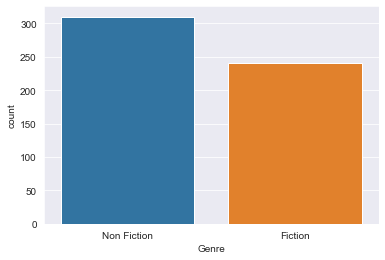

In [16]:
sns.countplot(x=df['Genre'])

Genre nonfiksi lebih banyak masuk ke dalam 50 buku bestselling daripada genre fiksi selama tahun 2009 - 2019.

<AxesSubplot:xlabel='Year'>

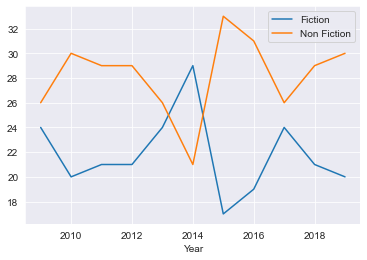

In [17]:
fiction_count = df[df['Genre'] == 'Fiction'].groupby('Year').size()
nonfiction_count = df[df['Genre'] == 'Non Fiction'].groupby('Year').size()

count_total = pd.DataFrame([fiction_count, nonfiction_count]).transpose()
count_total.columns = ['Fiction', 'Non Fiction']

count_total.plot()

Selama tahun 2009 - 2019, buku dengan genre nonfiksi selalu lebih banyak masuk ke dalam 50 buku bestselling daripada buku fiksi. Namun pada tahun 2014, genre fiksi sempat menyaingi genre nonfiksi.

<AxesSubplot:xlabel='Genre', ylabel='Weighted Rating'>

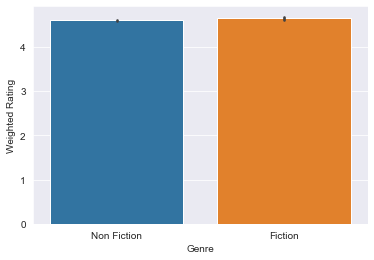

In [18]:
sns.barplot(data=df, x='Genre', y='Weighted Rating')

Kedua genre memiliki rata-rata nilai yang cenderung sama.

<AxesSubplot:xlabel='Year', ylabel='Weighted Rating'>

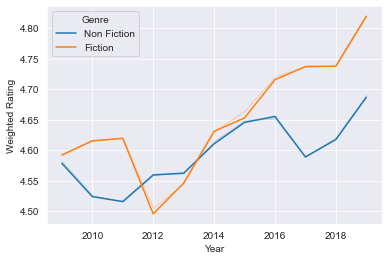

In [19]:
sns.lineplot(data=df, x='Year', y='Weighted Rating', hue='Genre', ci=False)

50 buku bestselling ber-genre fiksi setiap tahunnya memiliki nilai yang lebih tinggi daripada nonfiksi kecuali pada tahun 2012.

### Analisa Harga

Harga pada dataset ini dicantumkan pada variabel bernama _Price_. Harga dinyatakan dalam kurs dollar USD.

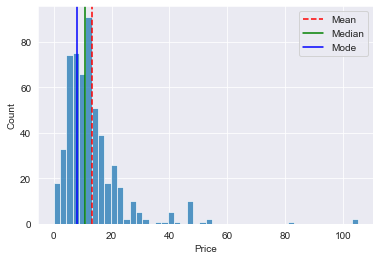

In [20]:
makeDistribution(df['Price'])

Dapat dilihat pada distribusi di atas, harga buku kebanyakan berkisar di bawah 20 dollar.

<AxesSubplot:xlabel='Year', ylabel='Price'>

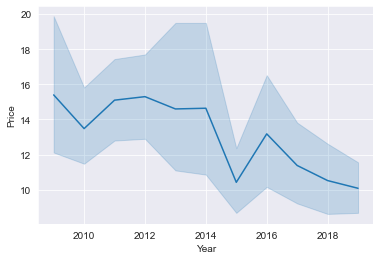

In [21]:
sns.lineplot(data=df, x='Year', y='Price')

Harga 50 buku _bestselling_ memiliki kecenderungan turun tiap tahunnya.

<AxesSubplot:xlabel='Genre', ylabel='Price'>

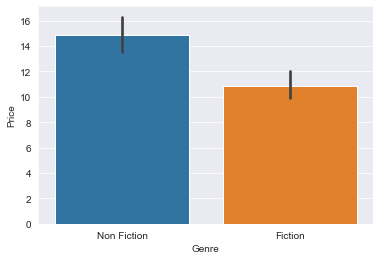

In [22]:
sns.barplot(data=df, x='Genre', y='Price')

Harga buku nonfiksi rata-rata lebih mahal daripada buku fiksi.

<AxesSubplot:xlabel='Year', ylabel='Price'>

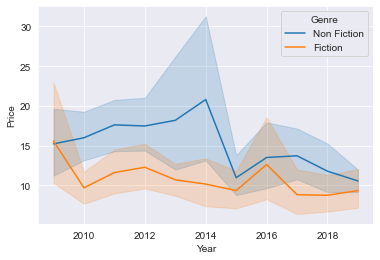

In [23]:
sns.lineplot(data=df, x='Year', y='Price', hue='Genre')

Setiap tahunnya juga rata-rata harga buku nonfiksi konsisten lebih mahal daripada genre fiksi.

#### Buku apa yang paling mahal?

In [24]:
df['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

Harga maksimal buku bestselling ini ialah 105 dollar. Harga minimum ialah 0. Dapat diasumsikan bahwa buku dengan harga 0 ini stoknya habis atau tidak lagi dijual.

In [40]:
df[df['Price'] == df['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,4.500652
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction,4.500652


Buku bestselling dengan harga termahal yaitu __"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5"__.

### Buku Terbaik

Karena dataset ini memiliki variabel yang terbatas, cara termudah untuk menentukan buku terbaik ialah dengan melihat _weighted rating_-nya.

Dataset akan dibagi terlebih dahulu menjadi dataset dengan buku fiksi dan nonfiksi.

In [26]:
df_fiction = df[df['Genre'] == 'Fiction']
df_nonfiction = df[df['Genre'] == 'Non Fiction']

In [27]:
df[df['Weighted Rating'] == df['Weighted Rating'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction,4.899524
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction,4.899524
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction,4.899524
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction,4.899524
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction,4.899524
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction,4.899524
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction,4.899524
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction,4.899524


Jika dilihat dari _weighted rating_-nya, buku bernama __"Oh, the Places You'll Go!"__ menempati posisi pertama dengan nilai _Weighted Rating_ sebessar 4.89952. Buku ini merupakan buku fiksi karangan Dr. Seuss. Buku ini juga konsisten masuk ke dalam 50 buku bestselling selama tahun 2012 hingga 2019.

Lalu saya juga akan mencari buku terbaik untuk tiap tahunnya.

In [42]:
best = []
for i in range(2009, 2020):
    temp = df[df['Year'] == i]
    best.append(temp[temp['Weighted Rating'] == temp['Weighted Rating'].max()])
    
pd.concat(best, axis=0)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction,4.799517
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,4.799774
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction,4.899469
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction,4.899524
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction,4.899524
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction,4.899524
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction,4.899524
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction,4.899524
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction,4.899524
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction,4.899524


Buku karangan Dr. Seuss selalu menduduki posisi pertama selama tahun 2012 hingga 2019. Sebelum itu, ada 3 buku yang menduduki posisi pertama tiap tahunnya, dua di antaranya merupakan buku nonfiksi.

Selanjutnya saya akan mencari buku terbaik untuk kategori nonfiksi.

In [28]:
df_nonfiction[df_nonfiction['Weighted Rating'] == df_nonfiction['Weighted Rating'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction,4.899469
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction,4.899469
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction,4.899469
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction,4.899469
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction,4.899469
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction,4.899469


In [29]:
df_nonfiction[df_nonfiction['Name'].str.contains("Jesus")]['Name'][187]

'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)'

Judul buku nonfiksi terbaik ialah __"Jesus Calling: Enjoying Peace in His Presence (with Scripture References)"__ yang ditulis oleh Sarah Young. Buku ini memiliki _Weighted Rating_ sebesar 4.899469 yang diulas sebanyak 19576 orang.

Selain buku terbaik, buku lainnya juga dapat diurutkan dengan mengurutkan _weighted ranking_-nya dari yang terbesar. Akan diambil 10 buku terbaik untuk tiap _genre_-nya

In [30]:
# genre fiksi
df_fiction.sort_values(['Weighted Rating'], ascending=False) \
.drop_duplicates('Name').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction,4.899524
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction,4.899470
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction,4.899468
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction,4.899275
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction,4.899177
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction,4.899126
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction,4.898967
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,4.898897
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction,4.898894
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction,4.898858


In [31]:
# genre nonfiksi
df_nonfiction.sort_values(['Weighted Rating'], ascending=False) \
.drop_duplicates('Name').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction,4.899469
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction,4.898681
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction,4.898261
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction,4.898235
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction,4.896773
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction,4.896342
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,4.799890
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,4.799774
326,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2016,Non Fiction,4.799737
352,The Boys in the Boat: Nine Americans and Their...,Daniel James Brown,4.8,23358,12,2015,Non Fiction,4.799713


Kesepuluh judul buku memiliki nilai _Weighted Rating_ yang hampir sama sehingga penggunaan plot bar tidak akan terlalu efektif. 

### Author Terbaik

Pencarian author / penulis terbaik dapat dilakukan dengan berbagai cara. Salah satu cara yang akan dilakukan pada analisa kali ini ialah mencari penulis dengan buku terbanyak. Cara ini dipakai dengan pertimbangan buku yang ada di dataset ini sudah termasuk ke dalam 50 _bestselling_ sehingga hanya cukup mencari penulis dengan banyak buku yang masuk ke dalam 50 _bestselling_.

<AxesSubplot:ylabel='Author'>

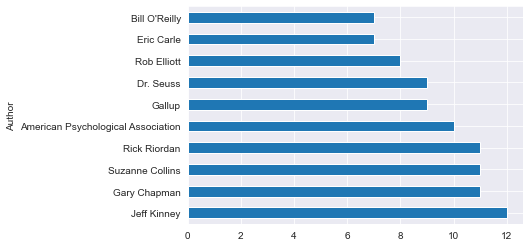

In [32]:
df.groupby('Author').size().sort_values(ascending=False).head(10).plot.barh()

Untuk penulis terbaik didapat oleh Jeff Kinney dengan total buku sebanyak 12. Ranking keseluruhan genre buku dapat dilihat juga pada grafik di atas.

In [35]:
df[df['Author'] == 'Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction,4.798520
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction,4.799019
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction,4.798265
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction,4.798978
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction,4.797912
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction,4.798696
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction,4.798917
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction,4.798856
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction,4.798868
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction,4.699529


Untuk informasi tambahan, berikut buku-buku yang ditulis oleh Jeff Kinney dan masuk ke dalam 50 _bestselling_. Kedua belas buku ini merupakan buku fiksi yang berseri.